In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv("cleaned_dataset.csv")

In [6]:
data = data.dropna(subset=["title", "label"])

x = data["title"]
y = data["label"]

Confusion Matrix:
[[156 104]
 [ 46 111]]


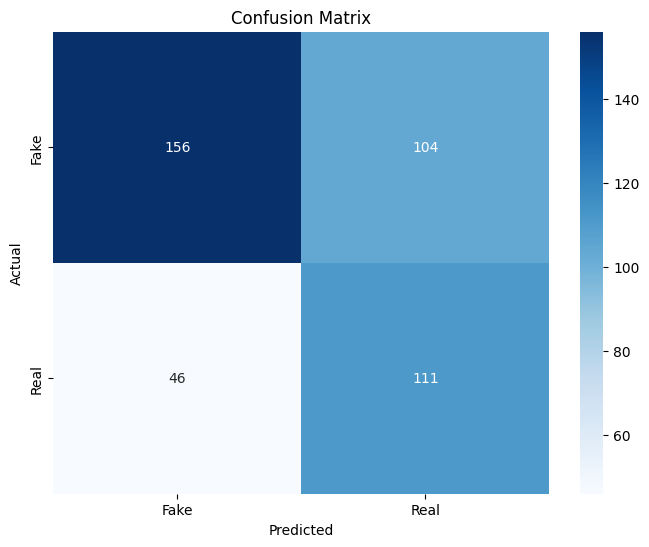

Accuracy: 0.64
              precision    recall  f1-score   support

        Fake       0.77      0.60      0.68       260
        Real       0.52      0.71      0.60       157

    accuracy                           0.64       417
   macro avg       0.64      0.65      0.64       417
weighted avg       0.68      0.64      0.65       417



In [7]:
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
x_tfidf = tfidf.fit_transform(x)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y_encoded, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
